In [ ]:
#Importing necessary libraries

In [2]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing

In [3]:
%matplotlib inline 

from IPython.display import Image
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import seaborn as sns

In [4]:
import warnings
warnings.simplefilter("ignore")


In [ ]:
#Importing the dataset file

In [5]:
df=pd.read_csv(r"C:/Users/Vidhya/Downloads/Telecom_customer_churn.csv")

In [6]:
df.shape

(7043, 21)

In [ ]:
#Our data has 7043 rows and 21 columns

In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
#We get all the mathematical details of the data with describe 

In [11]:
df.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [ ]:
#Cleaning data

In [ ]:
#Checking the distribution of tenure with histogram

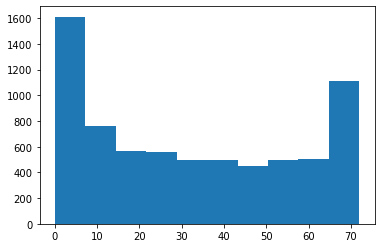

In [12]:
plt.hist(data = df, x = 'tenure');

In [ ]:
#We see that it is not a normal distribution

In [ ]:
#Column “TotalCharges” should be float type instead of the object type.

In [ ]:
#Copying our original dataset

In [13]:
df_copy = df.copy()

In [14]:
df_copy.TotalCharges = None
df_copy.TotalCharges=df_copy.TotalCharges.astype(float)

In [15]:
df_copy.TotalCharges.dtype

dtype('float64')

In [ ]:
#We have successfully converted to float type.

In [16]:
df_copy.TotalCharges = df_copy.tenure * df_copy.MonthlyCharges

In [17]:
df_copy[df_copy.tenure * df_copy.MonthlyCharges != df_copy.TotalCharges].shape

(0, 21)

In [ ]:
#Saving the clean data

In [18]:
df_copy.reset_index(drop=True)
df_copy.to_csv('Telco-Customer-Churn_clean.csv')

In [ ]:
#EDA

In [19]:

def desc(title=None, xscale=None, yscale=None, xlabel=None, ylabel=None, xlim=None, ylim=None, xticks1=None, xticks2=None, yticks1=None, yticks2=None,legend_title=None, legend_labels=None):
    if title:
        plt.title(title);
    if xscale:
        plt.xscale(xscale);
    if yscale:
        plt.yscale(yscale);
    if xlabel:
        plt.xlabel(xlabel);
    if ylabel:
        plt.ylabel(ylabel);
    if xlim:
        plt.xlim(xlim);
    if ylim:
        plt.ylim(ylim);
    if xticks1:
        plt.xticks(xticks1, xticks2);
    if yticks1:
        plt.yticks(yticks1, yticks2);
    if legend_title:
        plt.legend(title=legend_title);
        if legend_labels:
            plt.legend(title=legend_title, labels=legend_labels);

In [34]:
Churn_df = df_copy.query('Churn=="Yes"')
Churn_df.TotalCharges.describe()

count    1869.000000
mean     1531.608828
std      1886.774930
min        18.850000
25%       137.900000
50%       700.000000
75%      2334.800000
max      8481.600000
Name: TotalCharges, dtype: float64

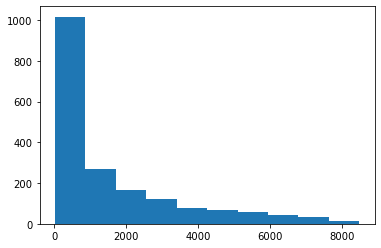

In [35]:
plt.hist(data = Churn_df, x = 'TotalCharges');

In [ ]:
#From the distribution, we see that around 80% of the data are extremely high, so lets divide them to 80% and the rest 20% to see each data distribution.

In [36]:
#find the 80th percentile of the data in total charges
Churn_df.TotalCharges.quantile(0.8)

2827.5900000000006

In [ ]:
#We got the output as 2827.5900000000006

In [ ]:
# Divide the data by the 80th percentile of the data, and show the distribution of its TotalCharges under 80th percentile 

In [37]:
TotalCharges_under80 = Churn_df.query('TotalCharges<=2827.59')
TotalCharges_above80 = Churn_df.query('TotalCharges>2827.59')

In [ ]:
#Visualizing

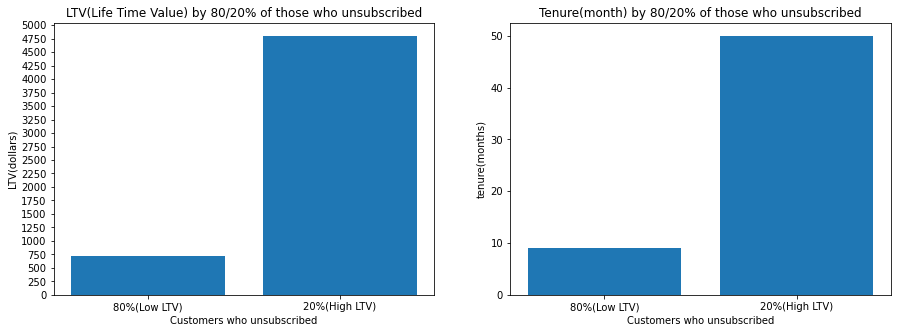

In [38]:
plt.figure(figsize = [15, 5])
# left plot: LTV by above and under 80th percentile of data who unsubscribed
plt.subplot(1, 2, 1)
plt.bar([1, 2], [713, 4801])
desc(yticks1=range(0,5250,250), yticks2=range(0,5250,250), xticks1=[1,2],xticks2=['80%(Low LTV)', '20%(High LTV)'],ylabel='LTV(dollars)',xlabel='Customers who unsubscribed', title='LTV(Life Time Value) by 80/20% of those who unsubscribed')

# right plot: Tenure by above and under 80th percentile of data who unsubscribed
plt.subplot(1, 2, 2)
plt.bar([1, 2], [9, 50])
desc(xticks1=[1,2],xticks2=['80%(Low LTV)', '20%(High LTV)'],ylabel='tenure(months)',xlabel='Customers who unsubscribed', title='Tenure(month) by 80/20% of those who unsubscribed')

In [39]:
#NOw lets plot graph that combines those who unsubscribed and those paying for the service.

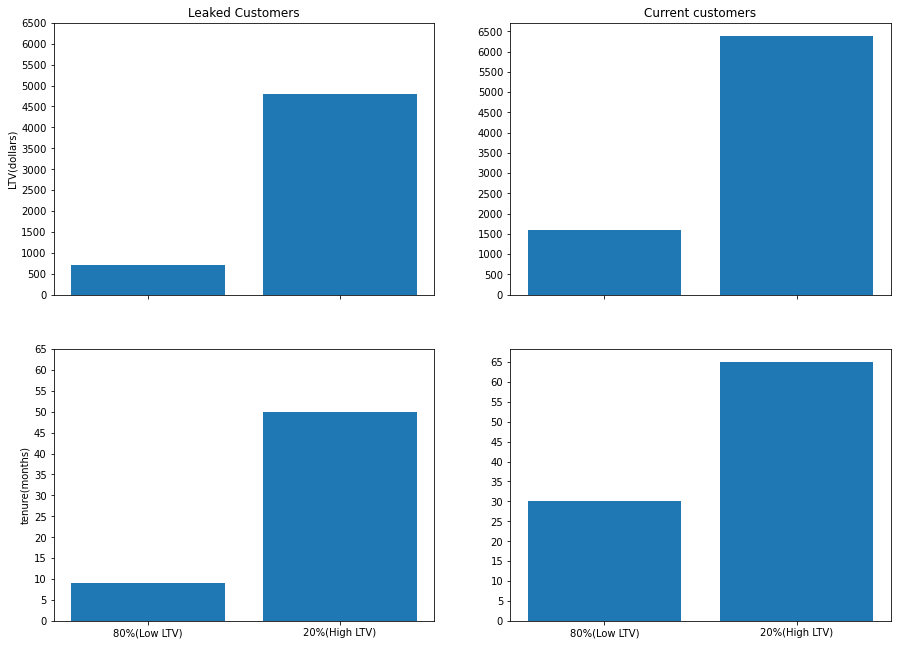

In [40]:
plt.figure(figsize = [15, 11])
# left plot: LTV by above and under 80th percentile of data who unsubscribed
plt.subplot(2, 2, 1)
plt.bar([1, 2], [713, 4801])
desc(yticks1=range(0,7000,500), yticks2=range(0,7000,500), xticks1=[1,2],xticks2=['', ''],ylabel='LTV(dollars)', title='Leaked Customers')
# # right plot: Tenure by above and under 80th percentile of data who unsubscribed
plt.subplot(2, 2, 2)
plt.bar([1, 2], [1589, 6389])
desc(yticks1=range(0,7000,500), yticks2=range(0,7000,500), xticks1=[1,2],xticks2=['', ''], title='Current customers')

# left plot: LTV by above and under 80th percentile of data who are still paying the service
plt.subplot(2, 2, 3)
plt.bar([1, 2], [9, 50])
desc(yticks1=range(0,70,5), yticks2=range(0,70,5),xticks1=[1,2],xticks2=['80%(Low LTV)', '20%(High LTV)'],ylabel='tenure(months)')

# # right plot: Tenure by above and under 80th percentile of data who are still paying the service
plt.subplot(2, 2, 4)
plt.bar([1, 2], [30, 65])
desc(yticks1=range(0,70,5), yticks2=range(0,70,5), xticks1=[1,2],xticks2=['80%(Low LTV)', '20%(High LTV)'])

In [ ]:
#80%(low LTV) of leaked customers only stayed under 10 months.
#average LTV of 80% of those who unsubscribed is 750 dollars
#average LTV of the top 20% of unsubscribed is 4750 dollars.

In [42]:
# Extract those who unsubscribed the service
Churn_df = Churn_df.query('Churn=="Yes"')
# Divide the data by the 80th percentile of the data, and show the distribution of its TotalCharges under 80th percentile 
TotalCharges_under80 = Churn_df.query('TotalCharges<=2827.59')
TotalCharges_above80 = Churn_df.query('TotalCharges>2827.59')
# Extract those who are paying the service
paying_df = Churn_df.query('Churn=="No"')
# Divide the data by the 80th percentile of the data, and show the distribution of its TotalCharges under 80th percentile 
paying_TotalCharges_under80 = paying_df.query('TotalCharges<=4890')
paying_TotalCharges_above80 = paying_df.query('TotalCharges>4890')

IndexError: index 0 is out of bounds for axis 0 with size 0

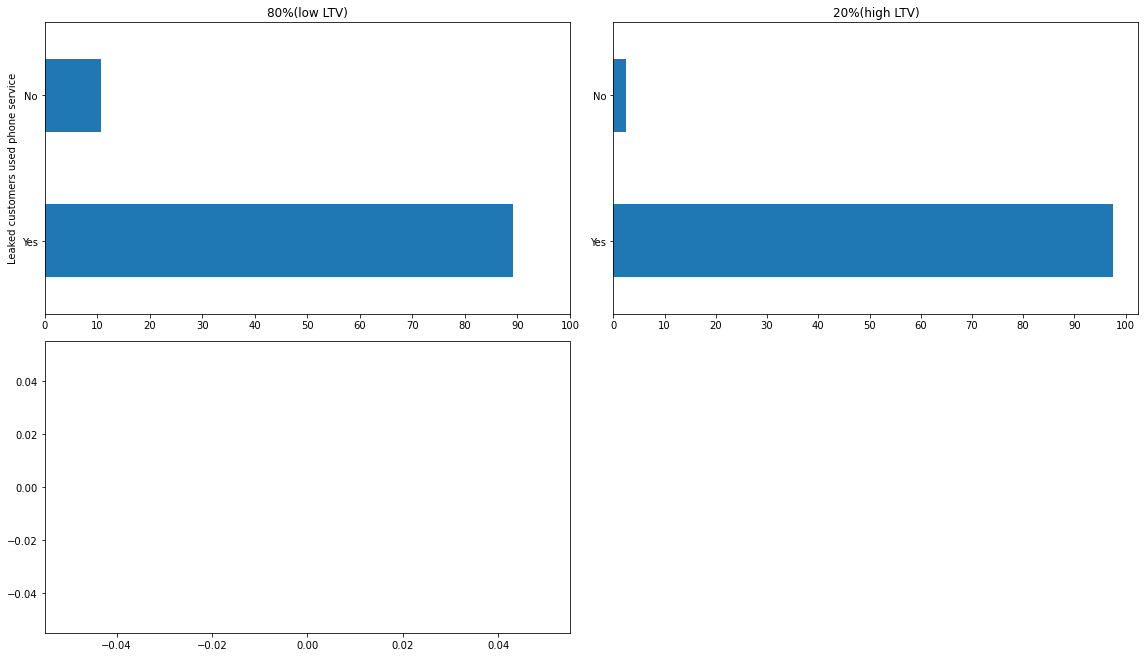

In [43]:
plt.figure(figsize = [16, 9])

plt.subplot(2, 2, 1)
# Group 1: 80%(low LTV) of data
((TotalCharges_under80.PhoneService.value_counts()/TotalCharges_under80.shape[0])*100).plot.barh();
desc(title="80%(low LTV)",ylabel='Leaked customers used phone service',xticks1=range(0,110,10),xticks2=range(0,110,10))

plt.subplot(2, 2, 2)
# Group 2: 20%(high LTV) of data
((TotalCharges_above80.PhoneService.value_counts()/TotalCharges_above80.shape[0])*100).plot.barh();
desc(title="20%(high LTV)",xticks1=range(0,110,10),xticks2=range(0,110,10))
plt.tight_layout()

# Investigate the proportion of people used phone service by each groups

plt.subplot(2, 2, 3)
# Group 1: 80%(low LTV) of data
((paying_TotalCharges_under80.PhoneService.value_counts()/paying_TotalCharges_under80.shape[0])*100).plot.barh();
desc(xlabel="%",ylabel='Current customers using phone service',xticks1=range(0,110,10),xticks2=range(0,110,10))

plt.subplot(2, 2, 4)
# Group 2: 20%(high LTV) of data
((paying_TotalCharges_above80.PhoneService.value_counts()/paying_TotalCharges_above80.shape[0])*100).plot.barh();
desc( xlabel="%",xticks1=range(0,110,10),xticks2=range(0,110,10))
plt.tight_layout()

In [ ]:
# 100% of those who brought high LTV used and are using internet service.

IndexError: index 0 is out of bounds for axis 0 with size 0

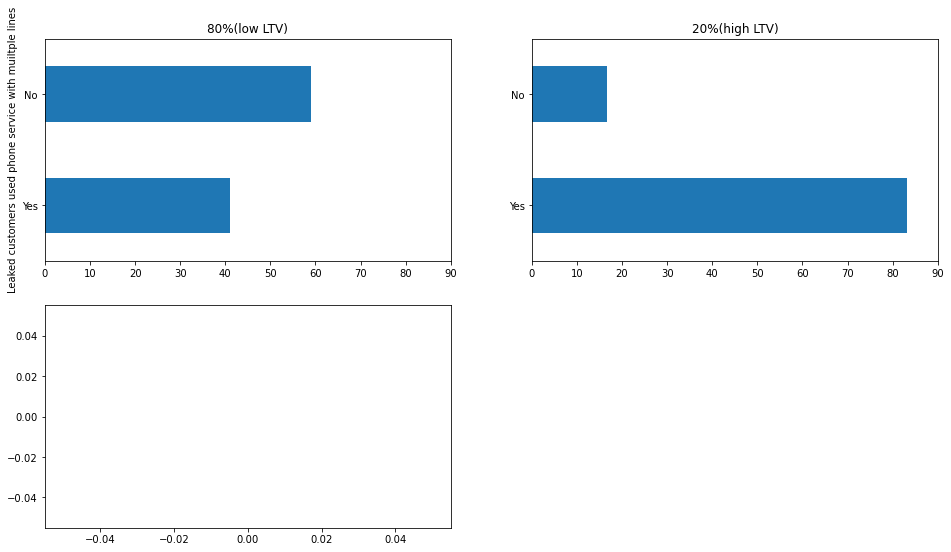

In [44]:
# Investigate the proportion of people who used phone service with muiltple lines by each groups
plt.figure(figsize = [16, 9])

plt.subplot(2, 2, 1)
# Group 1: 80%(low LTV) of data
TotalCharges_under80_use_phone = TotalCharges_under80.query('PhoneService=="Yes"')
(((TotalCharges_under80_use_phone.MultipleLines.value_counts()/TotalCharges_under80_use_phone.shape[0]).sort_values(ascending=True))*100).plot.barh();
desc(ylabel='Leaked customers used phone service with muiltple lines', title="80%(low LTV)",xticks1=range(0,100,10),xticks2=range(0,100,10));

plt.subplot(2, 2, 2)
# Group 2: 20%(high LTV) of data
TotalCharges_above80_use_phone = TotalCharges_above80.query('PhoneService=="Yes"')
((TotalCharges_above80_use_phone.MultipleLines.value_counts()/TotalCharges_above80_use_phone.shape[0])*100).plot.barh();
desc(title="20%(high LTV)", xticks1=range(0,100,10),xticks2=range(0,100,10));

# Investigate the proportion of people who used phone service withn muiltple lines by each groups

plt.subplot(2, 2, 3)
# Group 1: 80%(low LTV) of data
paying_TotalCharges_under80_use_phone = paying_TotalCharges_under80.query('PhoneService=="Yes"')
(((paying_TotalCharges_under80_use_phone.MultipleLines.value_counts()/paying_TotalCharges_under80_use_phone.shape[0]).sort_values(ascending=True))*100).plot.barh();
desc(ylabel='Current customers using phone service with muiltple lines', xlabel="%",xticks1=range(0,100,10),xticks2=range(0,100,10));

plt.subplot(2, 2, 4)
# Group 2: 20%(high LTV) of data
paying_TotalCharges_above80_use_phone = paying_TotalCharges_above80.query('PhoneService=="Yes"')
((paying_TotalCharges_above80_use_phone.MultipleLines.value_counts()/paying_TotalCharges_above80_use_phone.shape[0])*100).plot.barh();
desc( xlabel="%",xticks1=range(0,100,10),xticks2=range(0,100,10));

plt.tight_layout()

In [ ]:
 #81% of those who bring high LTVs tend to used lines

IndexError: index 0 is out of bounds for axis 0 with size 0

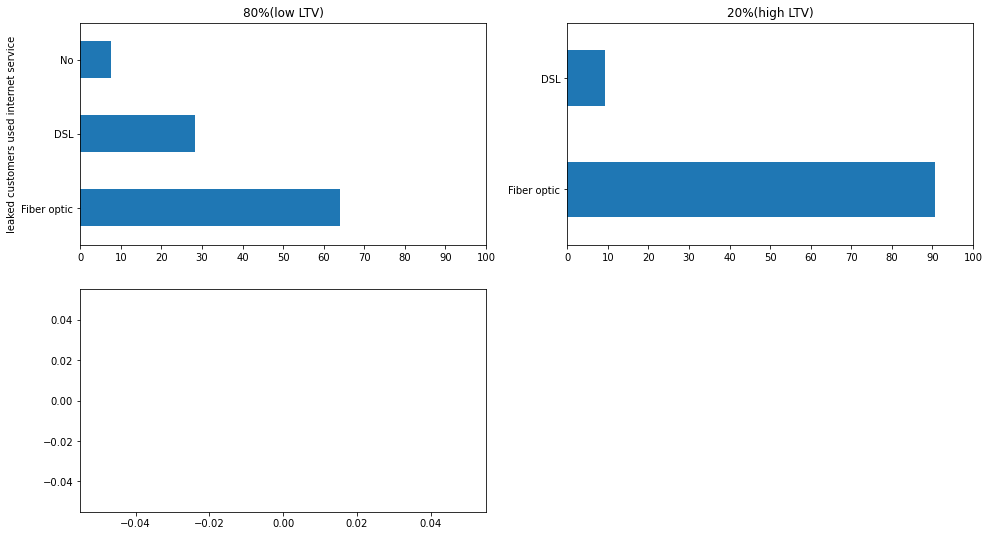

In [45]:
# Visualization
plt.figure(figsize = [16, 9])

plt.subplot(2, 2, 1)
# Group 1: 80%(low LTV) of data
((TotalCharges_under80.InternetService.value_counts()/TotalCharges_under80.shape[0])*100).plot.barh();
desc(ylabel='leaked customers used internet service',title="80%(low LTV)", xticks1=range(0,110,10),xticks2=range(0,110,10));

plt.subplot(2, 2, 2)
# Group 2: 20%(high LTV) of data
((TotalCharges_above80.InternetService.value_counts()/TotalCharges_above80.shape[0])*100).plot.barh();
desc(title="20%(high LTV)", xticks1=range(0,110,10),xticks2=range(0,110,10));

plt.subplot(2, 2, 3)
# Group 1: 80%(low LTV) of data
((paying_TotalCharges_under80.InternetService.value_counts()/paying_TotalCharges_under80.shape[0])*100).plot.barh();
desc(ylabel='Current customers using internet service', xlabel="%",xticks1=range(0,110,10),xticks2=range(0,110,10));

plt.subplot(2, 2, 4)
# Group 2: 20%(high LTV) of data
((paying_TotalCharges_above80.InternetService.value_counts()/paying_TotalCharges_above80.shape[0])*100).plot.barh();
desc(xlabel="%",xticks1=range(0,110,10),xticks2=range(0,110,10));

plt.tight_layout()

In [ ]:
#Those who bring high LTVs, loved to use Fiber optic(75%-90%) and DSL(10–20%), and none of them used internet service. While those who bring low LTVs, in terms of current customers, around 30% of them don’t use internet service.

In [ ]:
#Lets extract 80% with low LTV who used the internet service, and save each proportion of subsets of internet service in the variable “proportion_internet_sub_service”

In [46]:
TotalCharges_under80_use_internet = TotalCharges_under80.query('InternetService!="No"')
proportion_internet_sub_service = np.array([TotalCharges_under80_use_internet.query('OnlineSecurity=="Yes"').shape[0]/TotalCharges_under80_use_internet.shape[0],
TotalCharges_under80_use_internet.query('TechSupport=="Yes"').shape[0]/TotalCharges_under80_use_internet.shape[0],
TotalCharges_under80_use_internet.query('OnlineBackup=="Yes"').shape[0]/TotalCharges_under80_use_internet.shape[0],
TotalCharges_under80_use_internet.query('DeviceProtection=="Yes"').shape[0]/TotalCharges_under80_use_internet.shape[0],
TotalCharges_under80_use_internet.query('StreamingTV=="Yes"').shape[0]/TotalCharges_under80_use_internet.shape[0],
TotalCharges_under80_use_internet.query('StreamingMovies=="Yes"').shape[0]/TotalCharges_under80_use_internet.shape[0]])*100

In [ ]:
#Now lets extract 20% with high LTV who used the internet service, and save each proportion of subsets of internet service in the variable “proportion_internet_sub_service_above80”

In [47]:
TotalCharges_above80_use_internet = TotalCharges_above80.query('InternetService!="No"')
proportion_internet_sub_service_above80 = np.array([TotalCharges_above80_use_internet.query('OnlineSecurity=="Yes"').shape[0]/TotalCharges_above80_use_internet.shape[0],
TotalCharges_above80_use_internet.query('TechSupport=="Yes"').shape[0]/TotalCharges_above80_use_internet.shape[0],                                                
TotalCharges_above80_use_internet.query('OnlineBackup=="Yes"').shape[0]/TotalCharges_above80_use_internet.shape[0],
TotalCharges_above80_use_internet.query('DeviceProtection=="Yes"').shape[0]/TotalCharges_above80_use_internet.shape[0],
TotalCharges_above80_use_internet.query('StreamingTV=="Yes"').shape[0]/TotalCharges_above80_use_internet.shape[0],
TotalCharges_above80_use_internet.query('StreamingMovies=="Yes"').shape[0]/TotalCharges_above80_use_internet.shape[0]])*100

In [ ]:
#Extract 80% with low LTV who used the internet service, and save each proportion of subsets of internet service in the variable “paying_proportion_internet_sub_service_under80

In [49]:
paying_TotalCharges_under80_use_internet = paying_TotalCharges_under80.query('InternetService!="No"')
paying_proportion_internet_sub_service_under80 = np.array([paying_TotalCharges_under80_use_internet.query('OnlineSecurity=="Yes"').shape[0]/paying_TotalCharges_under80_use_internet.shape[0],
paying_TotalCharges_under80_use_internet.query('TechSupport=="Yes"').shape[0]/paying_TotalCharges_under80_use_internet.shape[0],
paying_TotalCharges_under80_use_internet.query('OnlineBackup=="Yes"').shape[0]/paying_TotalCharges_under80_use_internet.shape[0],
paying_TotalCharges_under80_use_internet.query('DeviceProtection=="Yes"').shape[0]/paying_TotalCharges_under80_use_internet.shape[0],
paying_TotalCharges_under80_use_internet.query('StreamingTV=="Yes"').shape[0]/paying_TotalCharges_under80_use_internet.shape[0],
paying_TotalCharges_under80_use_internet.query('StreamingMovies=="Yes"').shape[0]/paying_TotalCharges_under80_use_internet.shape[0]])*100

ZeroDivisionError: division by zero

In [ ]:
#Also lets extract 20% with high LTV who used the internet service, and save each proportion of subsets of internet service in the variable “paying_proportion_internet_sub_service_above80”

In [50]:
paying_TotalCharges_above80_use_internet = TotalCharges_above80.query('InternetService!="No"')
paying_proportion_internet_sub_service_above80 = np.array([paying_TotalCharges_above80.query('OnlineSecurity=="Yes"').shape[0]/paying_TotalCharges_above80.shape[0],
paying_TotalCharges_above80.query('TechSupport=="Yes"').shape[0]/paying_TotalCharges_above80.shape[0],                                                
paying_TotalCharges_above80.query('OnlineBackup=="Yes"').shape[0]/paying_TotalCharges_above80.shape[0],
paying_TotalCharges_above80.query('DeviceProtection=="Yes"').shape[0]/paying_TotalCharges_above80.shape[0],
paying_TotalCharges_above80.query('StreamingTV=="Yes"').shape[0]/paying_TotalCharges_above80.shape[0],
paying_TotalCharges_above80.query('StreamingMovies=="Yes"').shape[0]/paying_TotalCharges_above80.shape[0]])*100

ZeroDivisionError: division by zero

NameError: name 'paying_proportion_internet_sub_service_under80' is not defined

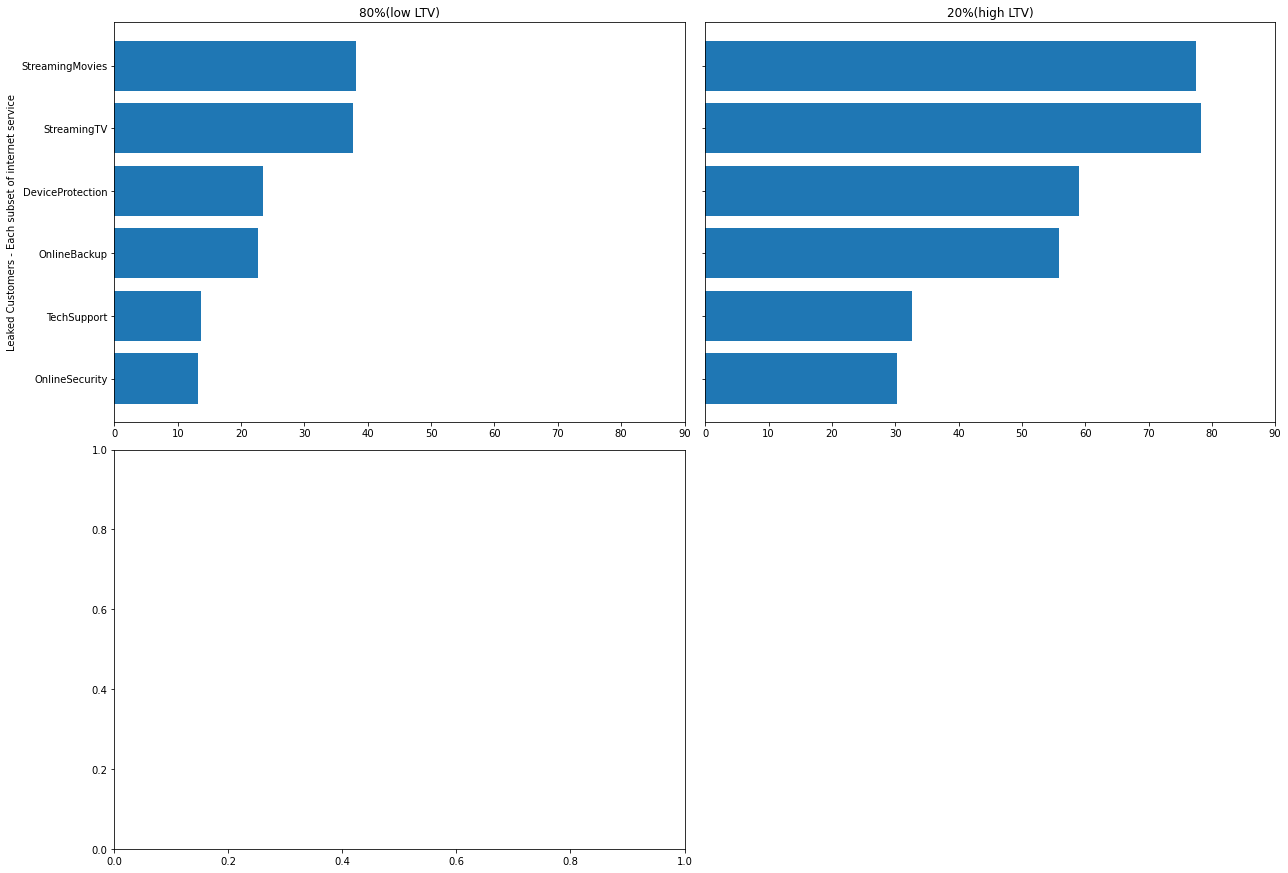

In [51]:
# Investigate the Proportion by subset of internet service by each groups
plt.figure(figsize = [18, 12])

plt.subplot(2, 2, 1)
# Group 1: 80%(low LTV) of data
plt.barh(range(0,6), proportion_internet_sub_service)
desc(ylabel='Leaked Customers - Each subset of internet service',title='80%(low LTV)',yticks1=range(0,6),yticks2=['OnlineSecurity','TechSupport','OnlineBackup','DeviceProtection','StreamingTV','StreamingMovies'],xticks1=range(0,100,10),xticks2=range(0,100,10))
plt.subplot(2, 2, 2)
# Group 2: 20%(high LTV) of data
plt.barh(range(0,6), proportion_internet_sub_service_above80)
desc(title='20%(high LTV)',yticks1=range(0,6),yticks2=['','','','','',''],xticks1=range(0,100,10),xticks2=range(0,100,10))
plt.tight_layout()

# Investigate the Proportion by subset of internet service by each groups

plt.subplot(2, 2, 3)
# Group 1: 80%(low LTV) of data
plt.barh(range(0,6),paying_proportion_internet_sub_service_under80)
desc(ylabel='Current Customers - Each subset of internet service',xlabel="%",yticks1=range(0,6),yticks2=['OnlineSecurity','TechSupport','OnlineBackup','DeviceProtection','StreamingTV','StreamingMovies'],xticks1=range(0,100,10),xticks2=range(0,100,10))
plt.subplot(2, 2, 4)
# Group 2: 20%(high LTV) of data
plt.barh(range(0,6), paying_proportion_internet_sub_service_above80)
desc(xlabel="%",yticks1=range(0,6),yticks2=['','','','','',''],xticks1=range(0,100,10),xticks2=range(0,100,10))
plt.tight_layout()

In [ ]:
#Among 80%(low LTVs) of data of current customers, all the subsets of internet services are equally used by 40% of people.
# And among 80% (low LTVs) of current customers, streaming movies and streaming TV are two top subsets of internet service people use, and device protection and online backup are the second places, and tech support and online security are both third places, the gaps between these are near 10% of whole data.

In [52]:
# The average LTV in 80%(low LTV) of data of leaked customers is 750
# The average LTV in 20%(high LTV) of data of leaked customers is 4750

# Extract the 80%(low LTV) of data that the LTV is higher than 750
paying_TotalCharges_under80_higherthanleak = paying_TotalCharges_under80.query('TotalCharges>750')
# Extract the 20%(high LTV) of data that the LTV is higher than 4750
paying_TotalCharges_above80_higherthanleak = paying_TotalCharges_above80.query('TotalCharges>4750')

In [ ]:
#Checking Internet service with multiple lines:

In [ ]:
#Using dummies for treating categorical variables

In [56]:
Churn_df[['Female', 'Male']] = pd.get_dummies(Churn_df['gender'])
Churn_df[['No', 'Have Partner']] = pd.get_dummies(Churn_df['Partner'])
Churn_df[['No Dependent', 'Dependents_Yes']] = pd.get_dummies(Churn_df['Dependents'])
Churn_df[['No', 'PhoneService']] = pd.get_dummies(Churn_df['PhoneService'])
Churn_df[['DSL', 'Fiber optic', 'No']] = pd.get_dummies(Churn_df['InternetService'])
Churn_df[['Month-to-month', 'One year', 'Two year']] = pd.get_dummies(Churn_df['Contract'])
Churn_df[['matBank transfer (autoic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check']] = pd.get_dummies(Churn_df['PaymentMethod'])

In [ ]:
#Using multiple linear regression:

In [58]:
sm=[]

In [61]:
Churn_df['intercept'] = 1
lm = sm(Churn_df['TotalCharges'], Churn_df[['intercept', 'Male', 'Have Partner', 'No Dependent',
                                               'PhoneService', 'DSL', 'Fiber optic', 'One year', 'Two year',
                                               'matBank transfer (autoic)', 'Credit card (automatic)', 
                                                'Electronic check']])
results = lm.fit()

TypeError: 'list' object is not callable

In [62]:
# Visualize the order of the variables that affects LTV from high to low.
plt.figure(figsize = [12, 6])
results.params.sort_values()[3:].plot.barh()
desc(xlabel="coefficient correlation", ylabel='variables',title='Coefficient correlations toward LTV by different variables');

NameError: name 'results' is not defined

<Figure size 864x432 with 0 Axes>

In [66]:
# convert the categorical variables to 0,1
Churn_df[['No','No internet service', 'OnlineSecurity']] = pd.get_dummies(Churn_df['OnlineSecurity'])
Churn_df[['No','No internet service', 'OnlineBackup']] = pd.get_dummies(Churn_df['OnlineBackup'])
Churn_df[['No','No internet service', 'DeviceProtection']] = pd.get_dummies(Churn_df['DeviceProtection'])
Churn_df[['No','No internet service', 'TechSupport']] = pd.get_dummies(Churn_df['TechSupport'])
Churn_df[['No','No internet service', 'StreamingTV']] = pd.get_dummies(Churn_df['StreamingTV'])
Churn_df[['No','No internet service', 'StreamingMovies']] = pd.get_dummies(Churn_df['StreamingMovies'])

# use mutiple linear regression
# and visualize the order of the variables that affects LTV from high to low.
Churn_df['intercept'] = 1
lm = sm.OLS(Churn_df['TotalCharges'], Churn_df[['intercept', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                                               'TechSupport', 'StreamingTV', 
                                                'StreamingMovies']])
results = lm.fit()
plt.figure(figsize = [12, 6])
results.params.sort_values()[1:].plot.barh();
desc(xlabel="coefficient correlation", ylabel='subsets of internet service',title='Coefficient correlations toward LTV by each internet service');

ValueError: Columns must be same length as key

In [ ]:
#We see that 80%(low LTV) of leaked customers only stayed under 10 months. And, their average is 750 dollars. 
#average LTV of the top 20% of those who leaked is 4750 dollars.
#81% of those who bring high LTVs tend to used lines.
#89% of those who leaked used a monthly contract, while only 42% of current customers use a monthly contract.